___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

## colab Package Update

In [1]:
!pip install -Uq matplotlib tensorflow-addons scikeras[tensorflow] 

     |████████████████████████████████| 9.4 MB 20.3 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 965 kB 14.9 MB/s 
     |████████████████████████████████| 295 kB 76.1 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 6.0 MB 61.6 MB/s 
     |████████████████████████████████| 439 kB 60.6 MB/s 
     |████████████████████████████████| 1.7 MB 56.8 MB/s 


⚠️ **restart**

## import

In [1]:
import tensorflow as tf

print("Tensorflow version \t\t:" + tf.__version__)

# print("Available devices:")
# for i, device in enumerate(tf.config.list_logical_devices()):
#     print("%d) %s" % (i, device))

print("Num physical_GPUs Available\t:", len(tf.config.list_physical_devices('GPU')))
print("Num physical_CPUs Available\t:", len(tf.config.list_physical_devices('CPU')))
print()
print("Num logical_GPUs Available\t:", len(tf.config.list_logical_devices('GPU')))
print("Num logical_CPUs Available\t:", len(tf.config.list_logical_devices('CPU')))

Tensorflow version 		:2.11.0
Num physical_GPUs Available	: 1
Num physical_CPUs Available	: 1

Num logical_GPUs Available	: 1
Num logical_CPUs Available	: 1


In [2]:
import tensorflow as tf
# Select 'TPU', 'GPU', 'CPU'.
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    # strategy = tf.distribute.TPUStrategy(resolver)
    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    
    print('TPU Device:', resolver.master(), len(tf.config.list_logical_devices('TPU')))
except ValueError:
    # If there's a GPU avaiable, to use the GPU,
    # otherwise, using the CPU instead.
    if tf.config.list_logical_devices('GPU'):        
        gpus = tf.config.list_logical_devices('GPU')
        strategy = tf.distribute.MirroredStrategy(gpus)   
        # strategy = tf.distribute.MirroredStrategy(["GPU:0", "GPU:1"])
          
        print('We will use the GPU Device:', gpus)    
    else:  
        # Use the Default Strategy
        strategy = tf.distribute.get_strategy()
        print('We will use the CPU Device because no GPU, TPU available.')
        
print('Number of replicas:', strategy.num_replicas_in_sync)
# tf.config.set_soft_device_placement(True)
# tf.debugging.set_log_device_placement(True)

We will use the GPU Device: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
Number of replicas: 1


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [4]:
random_state = seed = 101

In [5]:
# import gdown
# # same as the above, but with the file ID
# id = "1Ln96-m6v5H4GHZbdUlHoejmtT1l1LPou" # id: ...csv
# output = 'Churn_Modelling.zip' # download colab
# gdown.download(id=id, output=output, quiet=False)

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [15]:
df_origin = pd.read_csv("./Churn_Modelling.zip")
df = df_origin.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.duplicated().sum()

0

In [18]:
(df.isna().mean()*100)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [19]:
df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [20]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
skew,0.0,0.001149,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurtosis,-1.2,-1.196113,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


In [21]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [22]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

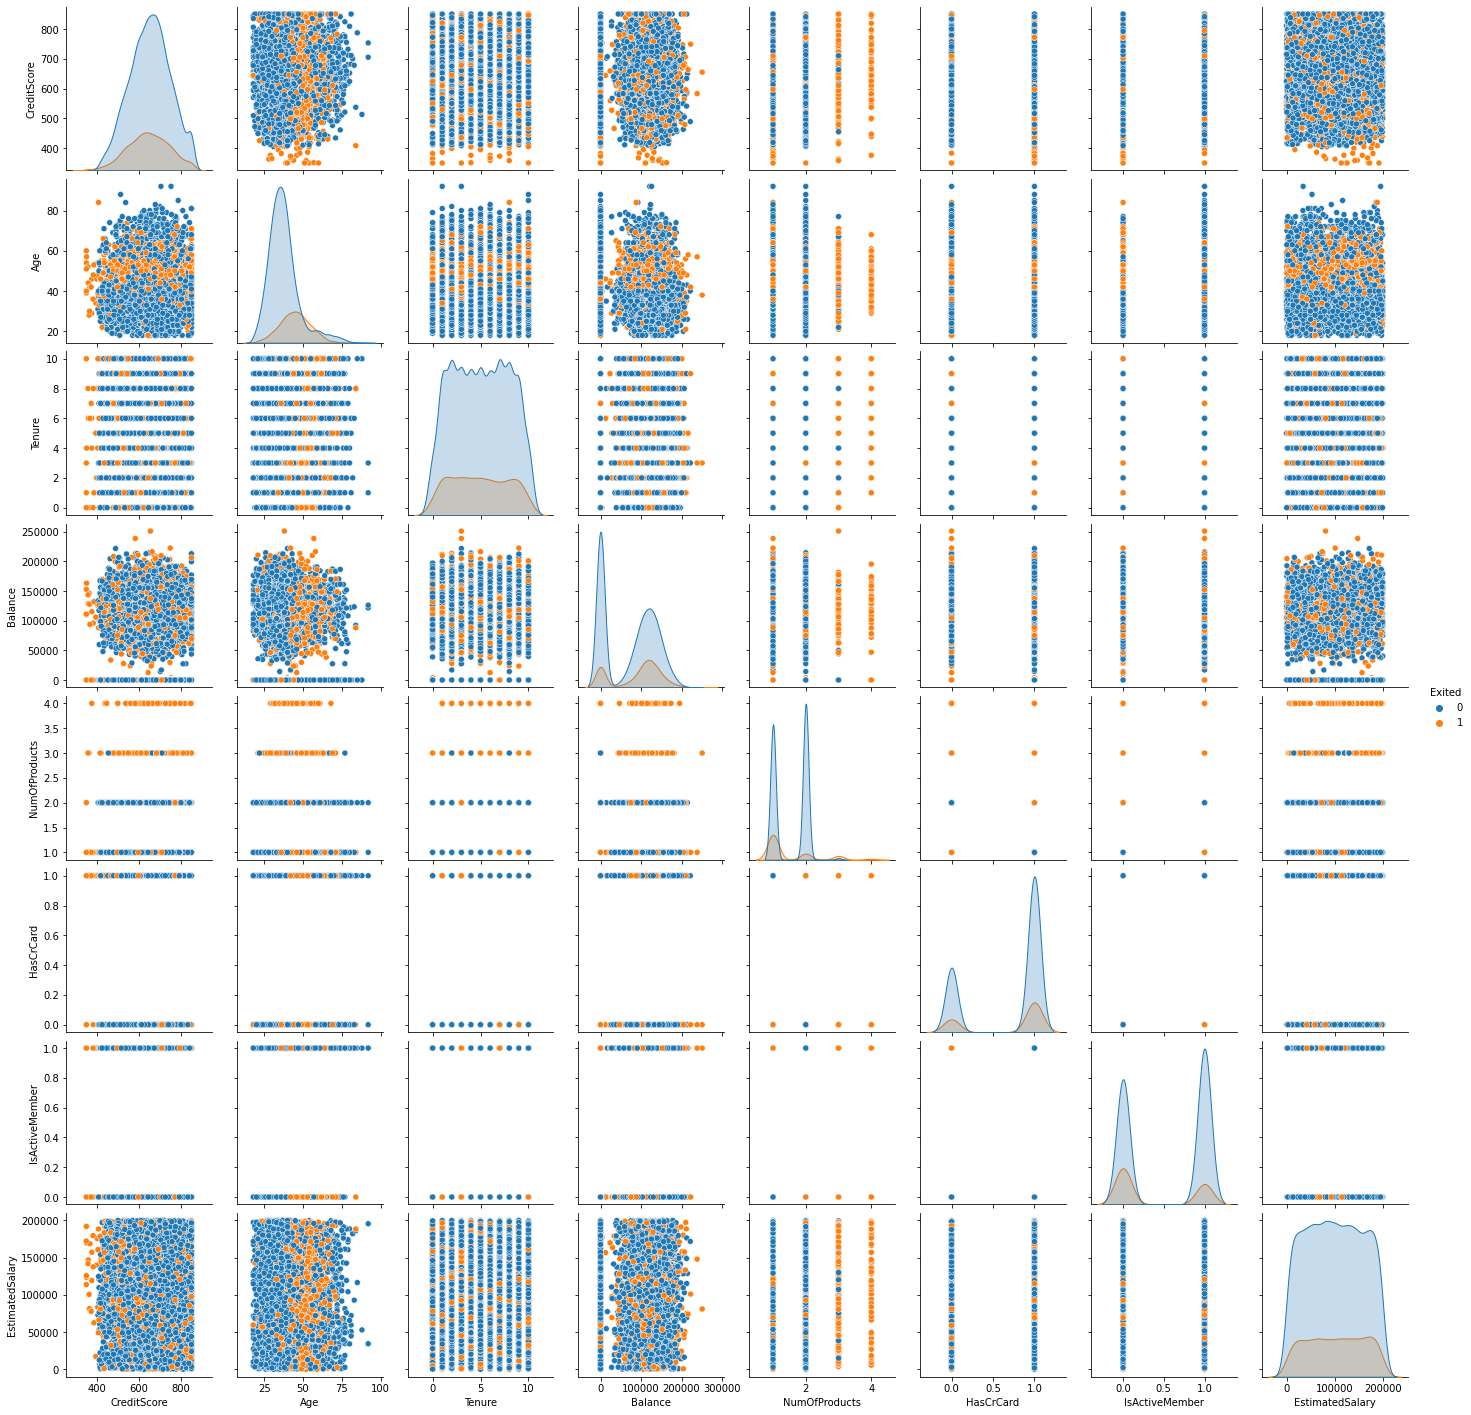

In [23]:
sns.pairplot(df, hue= "Exited")

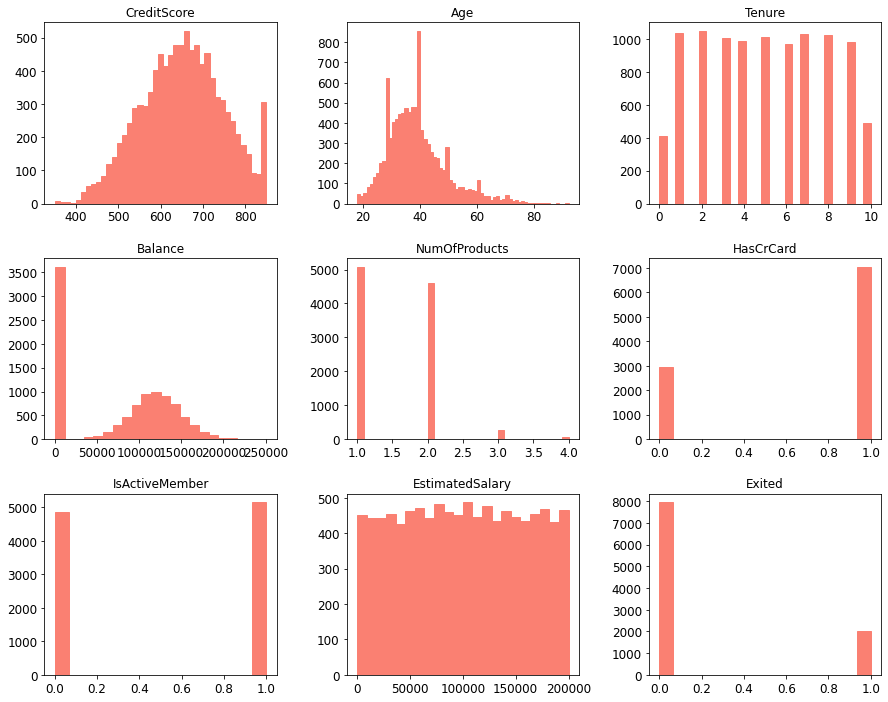

In [24]:
df.hist(
    xlabelsize=12, ylabelsize=12,
    color="salmon", edgecolor="salmon", 
    figsize=(15, 12), bins="auto", 
    grid=0
);

In [25]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

<AxesSubplot: >

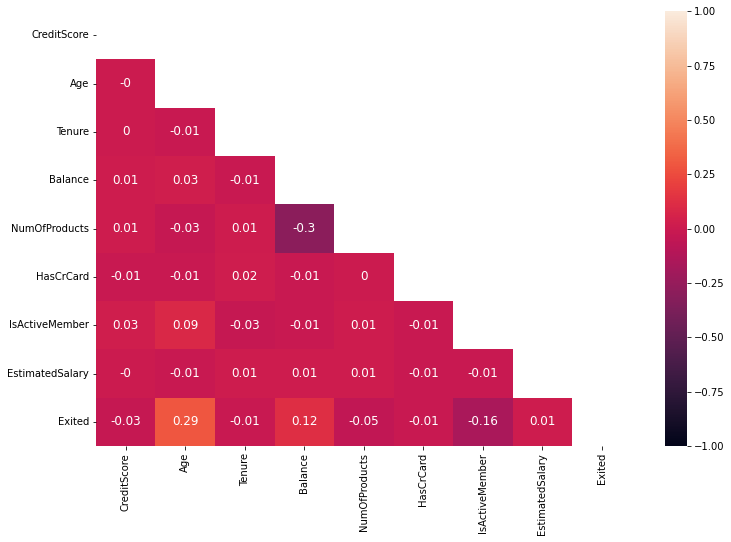

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1,
    annot_kws={'fontsize':12}
)

<AxesSubplot: >

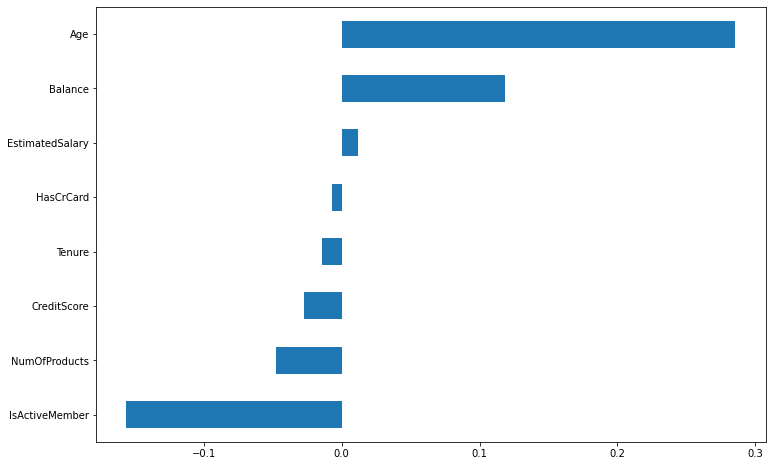

In [27]:
plt.figure(figsize=(12,8))
df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh")

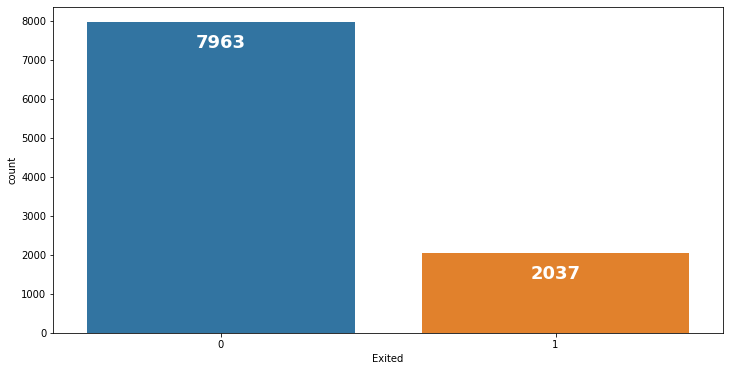

In [28]:
plt.figure(figsize=(12, 6))

g = sns.countplot(x=df["Exited"])
for c in g.containers:
  g.bar_label(c, padding=-29, fontsize=18, color='w', weight='bold');

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [30]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [33]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

In [34]:
# !pip install tensorflow -Uq
import tensorflow as tf
# !pip install tensorflow-addons -Uq
import tensorflow_addons as tfa

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import  SCORERS, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# !pip install scikeras[tensorflow] -Uq
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

## without class_weigth

### Create The Model

In [35]:
print("Model Defined Shape: ", X_train.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X_train.shape[1]*1.5)  # Input Layer Units

# way-1
def build_classifier_model(
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:    
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = "adam", 
                  loss = 'binary_crossentropy', 
                  metrics = ['Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [36]:
print("Model Defined Shape: ", X_train.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X_train.shape[1]*1.5)  # Input Layer Units

# way-2
def build_classifier_model_ann(
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)   
    outputs  = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = [tf.keras.metrics.Recall()], 
                  weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [37]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model1 = build_classifier_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [38]:
%%time
history = model1.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 64, epochs = 1000, verbose = 0)

CPU times: user 8min 53s, sys: 39.4 s, total: 9min 32s
Wall time: 8min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [39]:
# history_df = pd.DataFrame(model1.history.history)
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.head()

,loss,recall,val_loss,val_recall
1,0.527030,0.025672,0.487525,0.000000
2,0.463753,0.000000,0.473001,0.000000
3,0.450805,0.022616,0.454361,0.055838
4,0.434327,0.085575,0.436901,0.111675
5,0.419356,0.186430,0.421418,0.238579


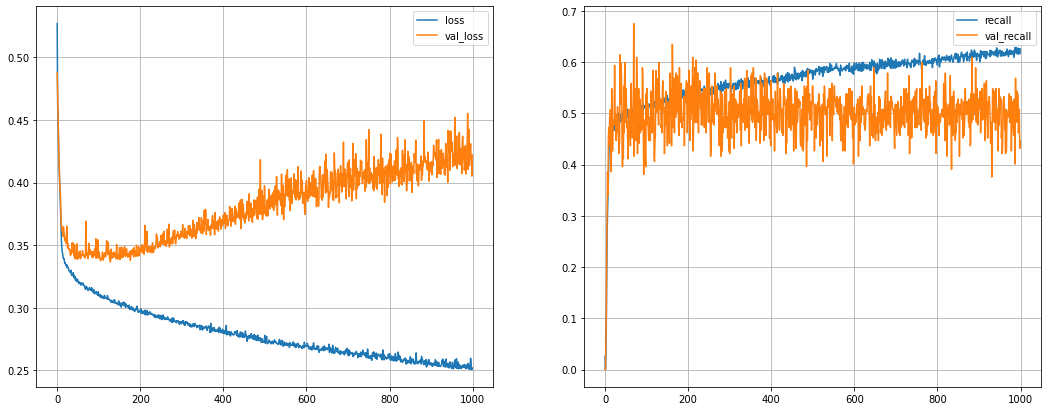

In [40]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [41]:
model1.metrics_names

['loss', 'recall']

In [42]:
model1.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.5097681283950806, 'recall': 0.36274510622024536}

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model1.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model1.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 1ms/step
[[762  34]
 [130  74]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       796
           1       0.69      0.36      0.47       204

    accuracy                           0.84      1000
   macro avg       0.77      0.66      0.69      1000
weighted avg       0.82      0.84      0.82      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 1ms/step
[[7037  130]
 [ 835  998]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      7167
           1       0.88      0.54      0.67      1833

    accuracy                           0.89      9000
   macro avg       0.89      0.76      0.80      9000
weighted avg       0.89      0.89      0.88      9000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [44]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
sample_weight

array([0.62787777, 0.62787777, 0.62787777, ..., 2.45499182, 0.62787777,
       2.45499182])

In [45]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [46]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model2 = build_classifier_model_ann()
model2.summary()

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [47]:
%%time
history = model2.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 64, epochs = 1000, verbose = 0, class_weight=class_weights)

CPU times: user 10min 15s, sys: 49.4 s, total: 11min 5s
Wall time: 8min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail()

,loss,recall,recall_1,val_loss,val_recall,val_recall_1
996,0.351154,0.842910,0.842910,0.476150,0.730964,0.730964
997,0.347857,0.847800,0.847799,0.448904,0.720812,0.720812
998,0.347557,0.850245,0.850244,0.484673,0.741117,0.741117
999,0.345695,0.847188,0.847188,0.453928,0.695431,0.695431
1000,0.349713,0.852078,0.852078,0.504096,0.741117,0.741117


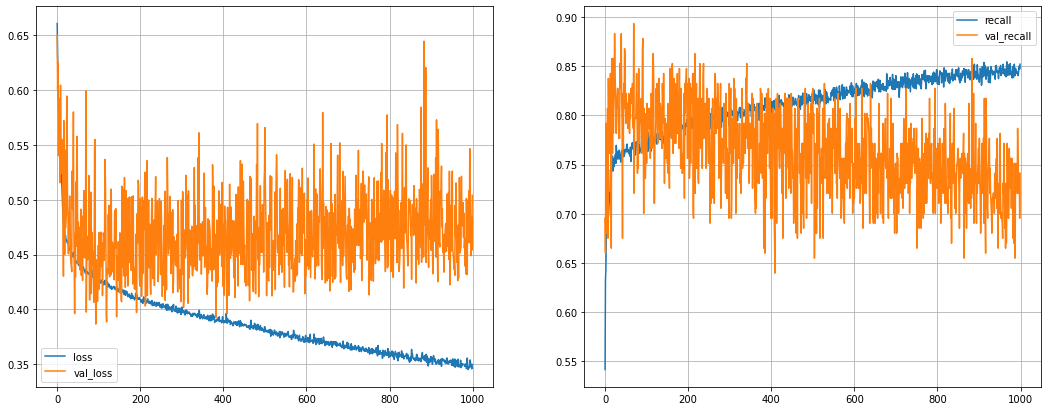

In [49]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [50]:
model2.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.582210123538971,
 'recall': 0.6617646813392639,
 'recall_1': 0.6617646813392639}

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model2.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model2.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 2ms/step
[[609 187]
 [ 69 135]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.42      0.66      0.51       204

    accuracy                           0.74      1000
   macro avg       0.66      0.71      0.67      1000
weighted avg       0.80      0.74      0.76      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 2ms/step
[[5900 1267]
 [ 260 1573]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7167
           1       0.55      0.86      0.67      1833

    accuracy                           0.83      9000
   macro avg       0.76      0.84      0.78      9000
weighted avg       0.88      0.83      0.84      9000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [52]:
# way-2
def build_classifier_model_ann(
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)   
    outputs  = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = [tf.keras.metrics.Recall()], 
                  weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

In [53]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model3 = build_classifier_model_ann()
# model3.optimizer.learning_rate = 5e-3
model3.summary()

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [54]:
%%time
history = model3.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 64, epochs = 1000, verbose = 0, class_weight=class_weights)

CPU times: user 10min 14s, sys: 49.2 s, total: 11min 3s
Wall time: 8min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [55]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail()

,loss,recall,recall_1,val_loss,val_recall,val_recall_1
996,0.328395,0.876528,0.876528,0.715090,0.746193,0.746193
997,0.334407,0.874083,0.874083,0.690075,0.776650,0.776650
998,0.335103,0.878362,0.878362,0.659137,0.756345,0.756345
999,0.325456,0.874083,0.874083,0.752869,0.807107,0.807107
1000,0.336456,0.879584,0.879584,0.701542,0.756345,0.756345


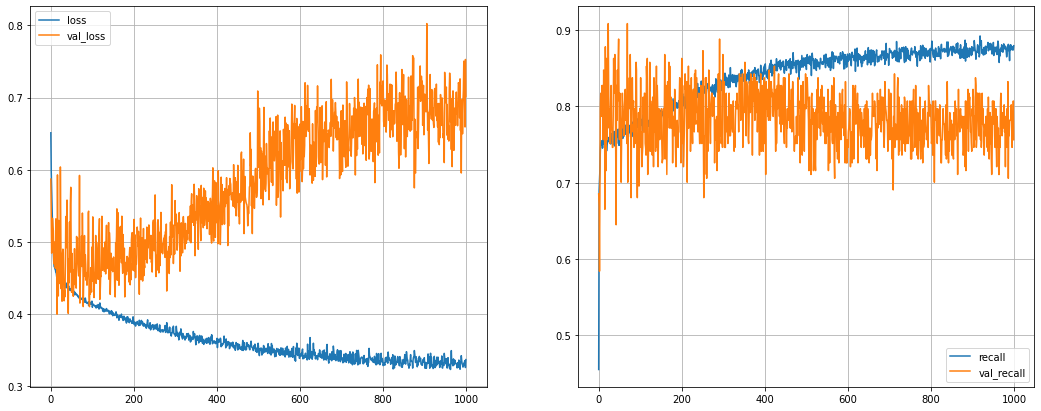

In [56]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [57]:
model3.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.823555052280426,
 'recall': 0.6666666865348816,
 'recall_1': 0.6666666865348816}

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model3.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model3.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 2ms/step
[[614 182]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.43      0.67      0.52       204

    accuracy                           0.75      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.80      0.75      0.77      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 2ms/step
[[5904 1263]
 [ 264 1569]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7167
           1       0.55      0.86      0.67      1833

    accuracy                           0.83      9000
   macro avg       0.76      0.84      0.78      9000
weighted avg       0.88      0.83      0.84      9000



### Add Dropout Layer

In [59]:
print("Model Defined Shape: ", X_train.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X_train.shape[1]*1.5)  # Input Layer Units

# way-1
def build_classifier_model(
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:    
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(Dropout(0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = "adam", 
                  loss = 'binary_crossentropy', 
                  metrics = ['Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [60]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model4 = build_classifier_model()
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [61]:
%%time
history = model4.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 64, epochs = 1000, verbose = 0, class_weight=class_weights)

CPU times: user 9min 33s, sys: 42.9 s, total: 10min 16s
Wall time: 7min 44s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [62]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail()

,loss,recall,val_loss,val_recall
996,0.390047,0.820905,0.479760,0.791878
997,0.386886,0.809902,0.477374,0.791878
998,0.380507,0.819682,0.457354,0.751269
999,0.388174,0.811125,0.474897,0.791878
1000,0.395007,0.805012,0.483760,0.822335


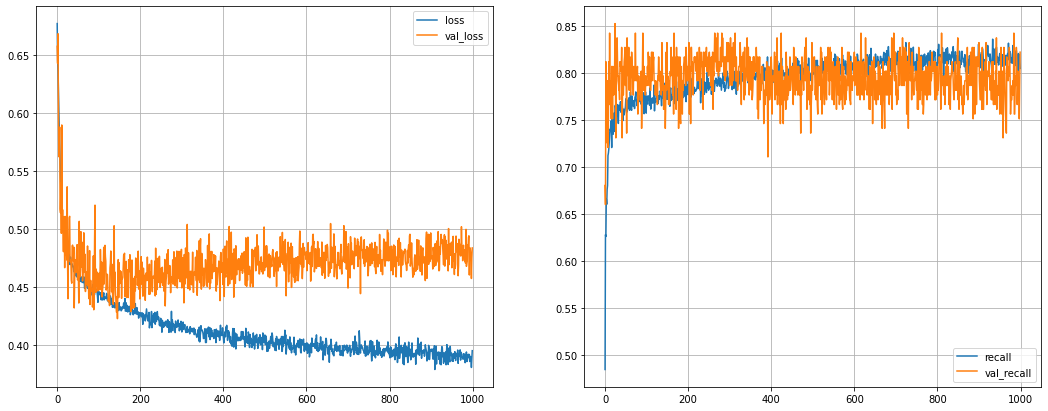

In [63]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [64]:
model4.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.5081912875175476, 'recall': 0.6911764740943909}

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model4.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model4.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 1ms/step
[[604 192]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       796
           1       0.42      0.69      0.53       204

    accuracy                           0.74      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.81      0.74      0.76      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 2ms/step
[[5894 1273]
 [ 277 1556]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      7167
           1       0.55      0.85      0.67      1833

    accuracy                           0.83      9000
   macro avg       0.75      0.84      0.78      9000
weighted avg       0.87      0.83      0.84      9000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model5 = build_classifier_model()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [69]:
%%time
history = model5.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 32, epochs = 1000, verbose = 0, callbacks=[early_stop], class_weight=class_weights)

Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping
CPU times: user 36.5 s, sys: 2.63 s, total: 39.2 s
Wall time: 29.9 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [70]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail(16)

,loss,recall,val_loss,val_recall
16,0.487435,0.723716,0.430917,0.664975
17,0.486471,0.715159,0.499836,0.822335
18,0.479261,0.731663,0.496093,0.781726
19,0.481762,0.715159,0.449280,0.741117
20,0.480524,0.720049,0.480814,0.796954
21,0.477580,0.732885,0.452609,0.751269
22,0.475050,0.728606,0.462733,0.766497
23,0.473350,0.726773,0.460266,0.766497
24,0.477055,0.726161,0.521014,0.812183
25,0.468453,0.735941,0.484896,0.776650


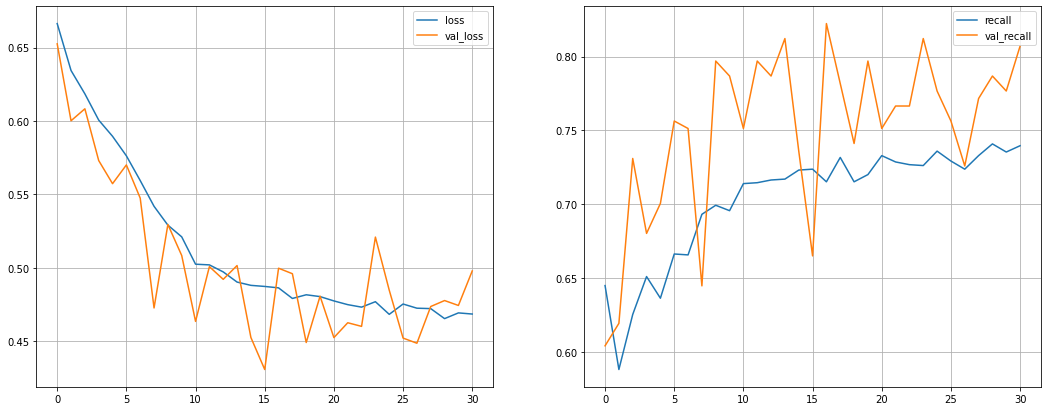

In [71]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [72]:
model5.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.4544583261013031, 'recall': 0.6323529481887817}

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model5.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model5.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 2ms/step
[[683 113]
 [ 75 129]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       796
           1       0.53      0.63      0.58       204

    accuracy                           0.81      1000
   macro avg       0.72      0.75      0.73      1000
weighted avg       0.83      0.81      0.82      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 1ms/step
[[6306  861]
 [ 596 1237]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7167
           1       0.59      0.67      0.63      1833

    accuracy                           0.84      9000
   macro avg       0.75      0.78      0.76      9000
weighted avg       0.85      0.84      0.84      9000



#### Monitor the "val_recall" as metric

In [74]:
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

model6 = build_classifier_model()
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [75]:
early_stop = EarlyStopping(monitor='val_recall', mode="max",
                           verbose = 1, patience = 15, restore_best_weights = True)

In [76]:
%%time
history = model6.fit(x = X_train, y = y_train, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 32, epochs = 1000, verbose = 0, callbacks=[early_stop], class_weight=class_weights)

Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping
CPU times: user 40.6 s, sys: 3.04 s, total: 43.6 s
Wall time: 31.8 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [77]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail(16)

,loss,recall,val_loss,val_recall
20,0.484913,0.745721,0.520443,0.852792
21,0.478282,0.770782,0.460417,0.766497
22,0.481753,0.750000,0.469391,0.766497
23,0.481786,0.751834,0.468872,0.776650
24,0.477822,0.757335,0.509207,0.827411
25,0.482459,0.757946,0.529729,0.832487
26,0.478417,0.757335,0.452704,0.776650
27,0.474775,0.762836,0.443530,0.766497
28,0.474365,0.761002,0.490491,0.807107
29,0.473815,0.767115,0.480647,0.812183


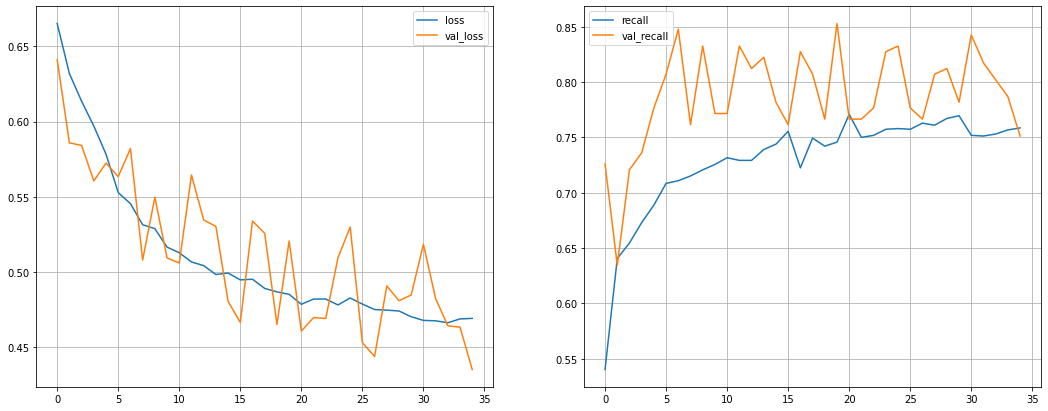

In [78]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [79]:
model6.evaluate(X_test, y_test, return_dict=True, verbose=0)

{'loss': 0.5518811941146851, 'recall': 0.7843137383460999}

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = model6.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = model6.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 1ms/step
[[536 260]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       796
           1       0.38      0.78      0.51       204

    accuracy                           0.70      1000
   macro avg       0.65      0.73      0.65      1000
weighted avg       0.81      0.70      0.72      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 0s 2ms/step
[[5172 1995]
 [ 317 1516]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      7167
           1       0.43      0.83      0.57      1833

    accuracy                           0.74      9000
   macro avg       0.69      0.77      0.69      9000
weighted avg       0.84      0.74      0.77      9000



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [81]:
print("Model Defined Shape: ", X_train.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X_train.shape[1]*1.5)  # Input Layer Units

# way-1
def build_classifier_model_ann(
        optimizer: tf.keras.optimizers.Optimizer = tf.keras.optimizers.Adam,
        learning_rate: float = 1e-3,
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)     
    outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = [tf.keras.metrics.Recall()], 
                  # weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [82]:
print("Model Defined Shape: ", X_train.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X_train.shape[1]*1.5)  # Input Layer Units

# way-2
def build_classifier_model(
        optimizer: tf.keras.optimizers.Optimizer = tf.keras.optimizers.Adam,
        learning_rate: float = 1e-3,
        input_dim: int = X_train.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf    
    
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_shape=(input_dim, ) )) # input_dim = input_dim
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = 'binary_crossentropy', 
                  metrics = ['Recall'], 
                  # weighted_metrics=['Recall']
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [83]:
tf.keras.backend.clear_session()
build_classifier_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [84]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [85]:
%%time
from sklearn.model_selection import cross_validate, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)

classifier = KerasClassifier(
    build_fn  = build_classifier_model, optimizer = tf.keras.optimizers.Nadam, learning_rate = 5e-3,
    validation_split=.1, batch_size=32, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
scores = cross_validate(
    estimator= classifier, 
    X = X_train, y = y_train, 
    scoring = ['precision','recall', 'f1', 'accuracy'], # scoring,
    return_train_score=True,
    error_score="raise",
    verbose=0,
    n_jobs=-1,
    cv=4,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns').iloc[:, 2:]
df_scores.agg(["mean", "std"]).T

CPU times: user 736 ms, sys: 304 ms, total: 1.04 s
Wall time: 2min 37s


,mean,std
test_precision,0.561453,0.021764
train_precision,0.580627,0.026586
test_recall,0.643878,0.029986
train_recall,0.653305,0.017367
test_f1,0.599160,0.010050
train_f1,0.614230,0.007209
test_accuracy,0.824778,0.004737
train_accuracy,0.832667,0.010981


In [86]:
%%time
from sklearn.model_selection import cross_validate, cross_val_score
from scikeras.wrappers import KerasClassifier, KerasRegressor
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

classifier = KerasClassifier(
    model  = build_classifier_model, model__optimizer = tf.keras.optimizers.Nadam, model__learning_rate = 5e-3,
    validation_split=.1, batch_size=32, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
scores = cross_validate(
    estimator= classifier, 
    X = X_train, y = y_train, 
    scoring = ['precision','recall', 'f1', 'accuracy'], # scoring,
    return_train_score=True,
    error_score="raise",
    verbose=0,
    n_jobs=-1,
    cv=4,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns').iloc[:, 2:]
df_scores.agg(["mean", "std"]).T

CPU times: user 1.01 s, sys: 160 ms, total: 1.17 s
Wall time: 3min 51s


,mean,std
test_precision,0.476212,0.041948
train_precision,0.491697,0.050213
test_recall,0.765430,0.054319
train_recall,0.791414,0.048623
test_f1,0.584610,0.019854
train_f1,0.603679,0.024653
test_accuracy,0.777333,0.031920
train_accuracy,0.786667,0.035604


## GridSearchCV

In [87]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [88]:
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
tf.keras.backend.clear_session()

tf.random.set_seed(seed)
np.random.seed(seed)

early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)

classifier = KerasClassifier(
    build_fn  = build_classifier_model, optimizer = tf.keras.optimizers.Nadam, learning_rate = 5e-3,
    validation_split=.1, epochs=50, verbose=1, callbacks = [early_stop], class_weight = class_weights,
)
parameters = {
    'batch_size': [32, 64, 128], 
    'optimizer': [Adam, RMSprop, Adadelta, Nadam],
    'learning_rate': [0.001, 0.003]}

grid_model = GridSearchCV(
    estimator = classifier,
    param_grid = parameters,
    scoring = 'neg_log_loss',
    verbose = 0,
    n_jobs = -1,
    cv = 3,
)

In [89]:
%%time
grid_model.fit(X_train, y_train)

Epoch 1/50
254/254 [==============================] - 5s 7ms/step - loss: 0.6806 - recall: 0.6363 - val_loss: 0.6846 - val_recall: 0.8629
Epoch 2/50
254/254 [==============================] - 2s 6ms/step - loss: 0.6098 - recall: 0.6980 - val_loss: 0.5032 - val_recall: 0.5787
Epoch 3/50
254/254 [==============================] - 2s 6ms/step - loss: 0.5857 - recall: 0.7072 - val_loss: 0.5636 - val_recall: 0.7817
Epoch 4/50
254/254 [==============================] - 2s 6ms/step - loss: 0.5655 - recall: 0.7292 - val_loss: 0.5333 - val_recall: 0.7766
Epoch 5/50
254/254 [==============================] - 2s 6ms/step - loss: 0.5542 - recall: 0.7225 - val_loss: 0.5313 - val_recall: 0.7817
Epoch 6/50
254/254 [==============================] - 2s 6ms/step - loss: 0.5396 - recall: 0.7304 - val_loss: 0.4779 - val_recall: 0.7056
Epoch 7/50
254/254 [==============================] - 2s 6ms/step - loss: 0.5331 - recall: 0.7231 - val_loss: 0.5693 - val_recall: 0.8579
Epoch 8/50
254/254 [==============

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fecf39d8730>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learning_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_experimental.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>]},
             scoring='neg_log_loss')

In [90]:
grid_model.best_score_

-0.40886312325489577

In [91]:
grid_model.best_params_

{'batch_size': 32,
 'learning_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_experimental.adam.Adam}

In [94]:
# grid_model.cv_results_

grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
4,-0.408863,0.003667,1,"{'batch_size': 32, 'learning_rate': 0.003, 'op..."
23,-0.410535,0.001945,2,"{'batch_size': 128, 'learning_rate': 0.003, 'o..."
20,-0.410901,0.002508,3,"{'batch_size': 128, 'learning_rate': 0.003, 'o..."
5,-0.411677,0.017395,4,"{'batch_size': 32, 'learning_rate': 0.003, 'op..."
21,-0.414217,0.009597,5,"{'batch_size': 128, 'learning_rate': 0.003, 'o..."
7,-0.414768,0.016258,6,"{'batch_size': 32, 'learning_rate': 0.003, 'op..."
13,-0.418308,0.005349,7,"{'batch_size': 64, 'learning_rate': 0.003, 'op..."
12,-0.426408,0.005069,8,"{'batch_size': 64, 'learning_rate': 0.003, 'op..."
15,-0.427344,0.003896,9,"{'batch_size': 64, 'learning_rate': 0.003, 'op..."
11,-0.431073,0.003824,10,"{'batch_size': 64, 'learning_rate': 0.001, 'op..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred_test = grid_model.predict(X_test) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("-------------------------------------------------------")
print('TRAIN')
y_pred_train = grid_model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

TEST
32/32 [==============================] - 0s 3ms/step
[[664 132]
 [ 74 130]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       796
           1       0.50      0.64      0.56       204

    accuracy                           0.79      1000
   macro avg       0.70      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000

-------------------------------------------------------
TRAIN
282/282 [==============================] - 1s 2ms/step
[[6220  947]
 [ 570 1263]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      7167
           1       0.57      0.69      0.62      1833

    accuracy                           0.83      9000
   macro avg       0.74      0.78      0.76      9000
weighted avg       0.85      0.83      0.84      9000



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 2ms/step


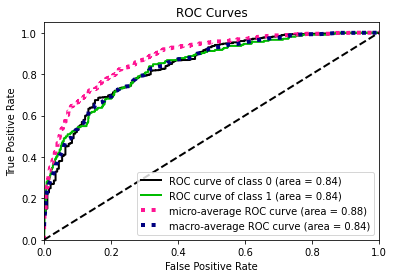

In [146]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

y_pred_proba = grid_model.predict_proba(X_test)

# skplt.metrics.plot_roc(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

32/32 [==============================] - 0s 2ms/step


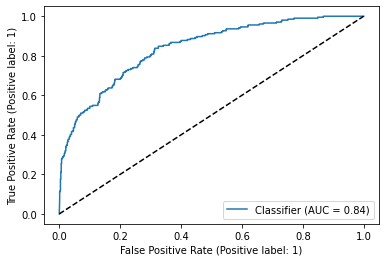

In [195]:
from sklearn.metrics import RocCurveDisplay

y_pred_proba = grid_model.predict_proba(X_test)

RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.plot([0, 1],[0, 1], 'k--')
plt.show();

In [147]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.8381921864223076

32/32 [==============================] - 0s 2ms/step


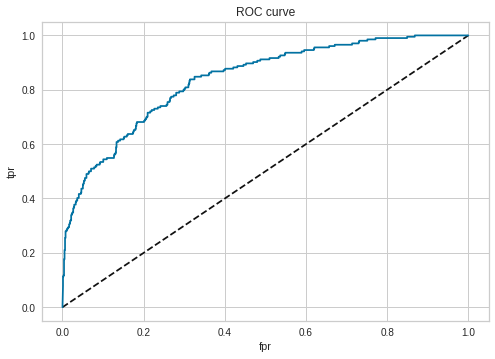

In [208]:
y_pred_proba = grid_model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0, 1],[0, 1], 'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### Precision Recall Curve

32/32 [==============================] - 0s 3ms/step


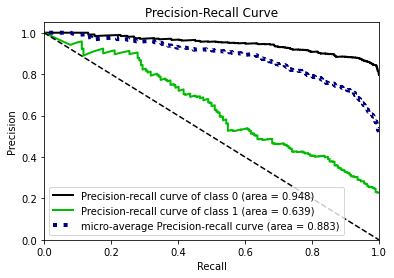

In [199]:
# !pip install scikit-plot -Uq
import scikitplot as skplt

y_pred_proba = grid_model.predict_proba(X_test)

# skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
skplt.metrics.plot_precision_recall(y_test, y_pred_proba)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

In [150]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.639155184855461

32/32 [==============================] - 0s 3ms/step


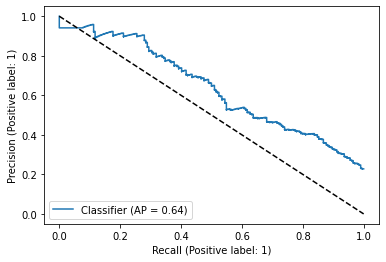

In [200]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict_proba(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.plot([0, 1],[1, 0], 'k--')
plt.show();

# Final Model and Model Deployment

In [154]:
X.shape, y.shape

((10000, 10), (10000,))

In [155]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [156]:
X = column_trans.fit_transform(X)

In [161]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

## Final Model

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [166]:
print("Model Defined Shape: ", X.shape[1])      # Input Layer Shape
print("Model Defined Unit : ", X.shape[1]*1.5)  # Input Layer Units

# way-1
def build_classifier_model_ann(
        optimizer: tf.keras.optimizers.Optimizer = tf.keras.optimizers.Adam,
        learning_rate: float = 3e-3,
        input_dim: int = X.shape[1],
        units:int      = 32,
) -> tf.keras.models.Model:
    import tensorflow as tf  
    
    inputs = tf.keras.layers.Input(shape=(input_dim, ) )
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x) 
    x = tf.keras.layers.Dense(8, activation=tf.nn.relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)     
    outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model") 

    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = tf.keras.losses.BinaryCrossentropy(), 
                  metrics = [tf.keras.metrics.Recall()], 
                  # weighted_metrics = [tf.keras.metrics.Recall()] 
                  )
    return model

Model Defined Shape:  13
Model Defined Unit :  19.5


In [167]:
tf.keras.backend.clear_session()

model = build_classifier_model_ann()
model.summary()

Model: "classifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                  

In [168]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",
                           verbose = 1, patience = 15, restore_best_weights = True)

In [169]:
%%time
history = model.fit(x = X, y = y, validation_split = 0.1, #validation_data = val_ds,
                    batch_size = 32, epochs = 1000, verbose = 0, callbacks=[early_stop], class_weight=class_weights)

Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping
CPU times: user 1min 35s, sys: 5.71 s, total: 1min 40s
Wall time: 1min 34s


In [170]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.tail(16)

,loss,recall,val_loss,val_recall
30,0.479399,0.759957,0.432400,0.659218
31,0.485256,0.748654,0.467165,0.698324
32,0.481136,0.760495,0.522116,0.748603
33,0.485899,0.754037,0.469060,0.664804
34,0.485027,0.757804,0.466446,0.681564
35,0.480193,0.765339,0.481139,0.703911
36,0.481354,0.765877,0.441909,0.675978
37,0.481491,0.754575,0.491424,0.726257
38,0.481172,0.750807,0.509997,0.754190
39,0.481076,0.746502,0.474860,0.670391


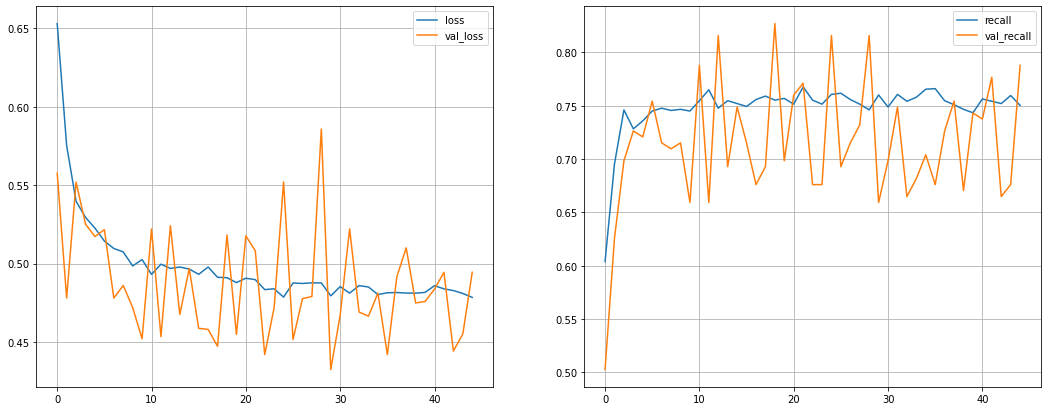

In [171]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 7))

plt.subplot(121)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
# plt.xlim([-45, 1500])
# plt.ylim([0.28, 0.38])
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['recall'], label = 'recall')
plt.plot(H['val_recall'], label = 'val_recall')
plt.grid()
plt.legend()

In [172]:
model.evaluate(X, y, return_dict=True, verbose=0)

{'loss': 0.41132938861846924, 'recall': 0.723122239112854}

In [174]:
from sklearn.metrics import confusion_matrix, classification_report

print('ALL DATA')
y_pred = grid_model.predict(X) >= 0.5     # model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

ALL DATA
313/313 [==============================] - 1s 2ms/step
[[6884 1079]
 [ 644 1393]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      7963
           1       0.56      0.68      0.62      2037

    accuracy                           0.83     10000
   macro avg       0.74      0.77      0.75     10000
weighted avg       0.84      0.83      0.83     10000



In [177]:
y_pred_proba = grid_model.predict_proba(X)[:, 1]

print("roc_auc_score          : ", roc_auc_score(y, y_pred_proba))
print("average_precision_score: ", average_precision_score(y, y_pred_proba))

313/313 [==============================] - 1s 3ms/step
roc_auc_score          :  0.8640215352904582
average_precision_score:  0.6949592877579414


## Saving Final Model and Scaler

In [179]:
import pickle

pickle.dump(column_trans, open("transform_customer_churn.pkl", 'wb'))

In [180]:
model.save('model_customer_churn.h5')

## Loading Model and Scaler

In [181]:
from tensorflow.keras.models import load_model

In [182]:
transform_churn = pickle.load(open("transform_customer_churn.pkl", "rb"))
model_churn = load_model('model_customer_churn.h5')

## Prediction

In [183]:
df['Exited'].head(1)

0    1
Name: Exited, dtype: int64

In [260]:
mean_human = df.drop('Exited', axis = 1).iloc[0:1, :]
display(mean_human)
mean_human = transform_churn.transform(mean_human)

result = (model_churn.predict(mean_human)>0.5).astype("uint8")
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


1/1 [==============================] - 0s 91ms/step


array([[1]], dtype=uint8)

In [258]:
mean_human = df.mode()
display(mean_human)

result = (model_churn.predict(transform_churn.transform(mean_human)) > 0.5).astype("uint8")
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,850,France,Male,37,2,0.0,1,1,1,24924.92,0


1/1 [==============================] - 0s 32ms/step


array([[0]], dtype=uint8)

In [259]:
mean_human = pd.DataFrame(df.mean()).T.join( df.select_dtypes('O').mode() )
display(mean_human)

result = (model_churn.predict(transform_churn.transform(mean_human)) > 0.5).astype("uint8")
result

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037,France,Male


1/1 [==============================] - 0s 17ms/step


array([[0]], dtype=uint8)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___